1.0 Project Problem Definition : IRIS FLOWER CLASSIFICATION

2.0 Preparing the Data

2.1 Import the Dependency

2.2 Loading the Data

In [1]:
# Importing the needed modules for this project
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the data.

df = pd.read_csv("C:/Users/FASANXI SODIQ/codesoft project datasets/iris.csv ")
df = df.drop(['Id'], axis=1)

In [3]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


2.3 Exploratory Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [34]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

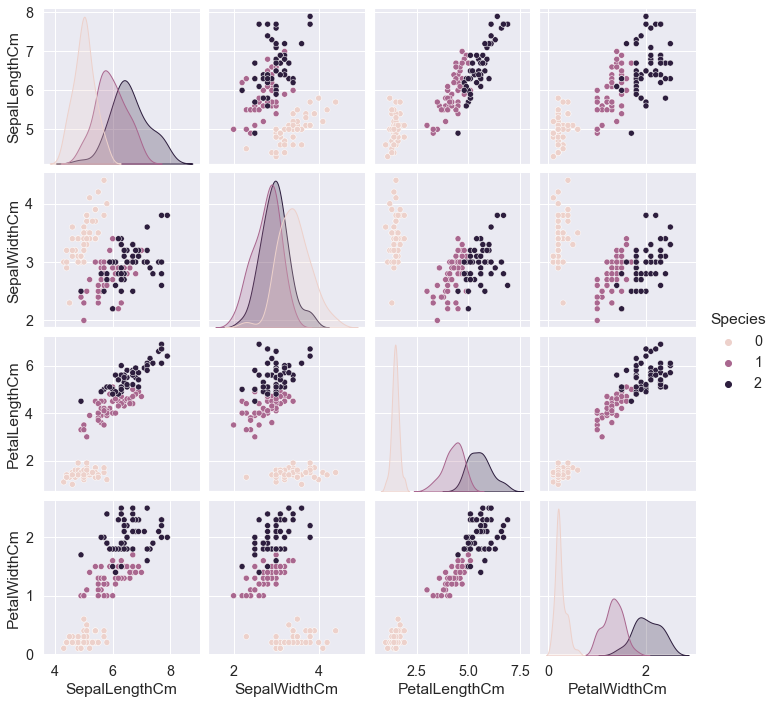

In [35]:
# Visualizing the data
sns.pairplot(df, hue='Species')

2.4 Cleaning the Data

In [7]:
df.duplicated().sum()

3

In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

2.5 Features Engineering/Features Transformation

In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Species'] = lb.fit_transform(df['Species'])

In [11]:
df['Species'].unique()

array([0, 1, 2])

2.6 Models Building

In [12]:
# import model dependency.
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from numpy import mean, absolute, sqrt
from sklearn import metrics as mt
from sklearn.svm import SVC

In [16]:
# split the scaled data into train_set and test_set
from sklearn.model_selection import train_test_split, cross_val_score, KFold
X = df.drop(['Species'], axis = 1).values
Y = df['Species'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, shuffle=True)
print("X_train :", x_train.shape)
print("X_test :", x_test.shape)
print("Y_train :", y_train.shape)
print("Y_test:", y_test.shape)

X_train : (105, 4)
X_test : (45, 4)
Y_train : (105,)
Y_test: (45,)


In [17]:
sc =  StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
# choosing the best performing model
classifiers = []
dt_model = dt_model = DecisionTreeClassifier()
classifiers.append(dt_model)

rf_model = RandomForestClassifier()
classifiers.append(rf_model)

svm_model = SVC()
classifiers.append(svm_model)

knn_model = KNeighborsClassifier()
classifiers.append(knn_model)

xgb_model = XGBClassifier()
classifiers.append(xgb_model)

for cf in classifiers:
    cf.fit(x_train, y_train)
    y_pred = cf.predict(x_test)
    accuracy =  round(accuracy_score(y_test, y_pred)*100, 2)
    print("Accuracy Score of %s is %s"%(cf,accuracy))
    model_f1_scores = round(f1_score(y_test,y_pred, average= 'micro')*100, 1)
    print("F1 Score of %s is %s"%(cf, model_f1_scores))
    
# best performing models are DT model, RF model, SCV model and XGB model.

Accuracy Score of DecisionTreeClassifier() is 97.78
F1 Score of DecisionTreeClassifier() is 97.8
Accuracy Score of RandomForestClassifier() is 97.78
F1 Score of RandomForestClassifier() is 97.8
Accuracy Score of SVC() is 97.78
F1 Score of SVC() is 97.8
Accuracy Score of KNeighborsClassifier() is 95.56
F1 Score of KNeighborsClassifier() is 95.6
Accuracy Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
       

HYPERPARAMETERS TURNING:

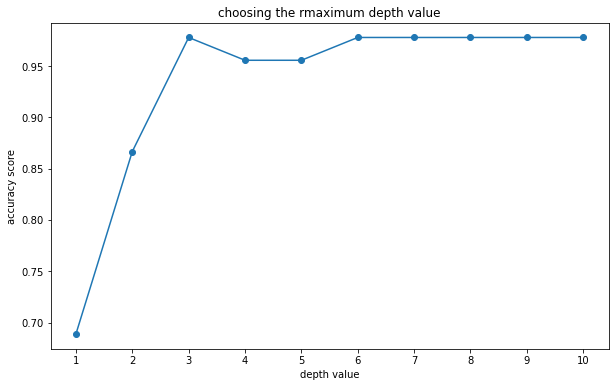

In [22]:
# select the maximum depth value

max_depth = [ ]
acc_scores = [ ]
cols = ['depth_val', 'acc_scores'] 
for d in range(1,11):
    dt_model = DecisionTreeClassifier(criterion ="entropy",  max_depth = d, random_state=1)
    dt_model.fit(x_train,y_train)
    ypred_dt = dt_model.predict(x_test)
    max_depth.append(d)
    acc_scores.append(accuracy_score(y_test, ypred_dt))
dt_df = pd.DataFrame(list(zip(max_depth,acc_scores)), columns = cols)


# visualise the max depth valus
plt.figure(figsize=(10,6))
plt.plot(range(1,11), acc_scores, marker = "o")
plt.xlabel("depth value")
plt.ylabel("accuracy score")
plt.title("choosing the rmaximum depth value")
plt.xticks(range(1,11))
plt.show()

# maximum depth value with highest accuracy score start  from 2 and 3.



classification report
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



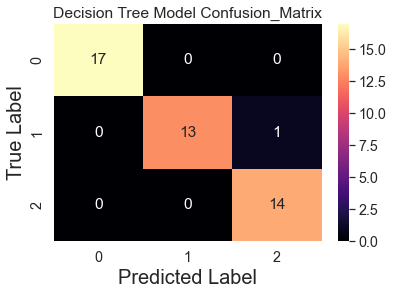

<Figure size 288x144 with 0 Axes>

In [24]:
# build the decision 
dt_model = DecisionTreeClassifier( max_depth = 3, random_state=1)
dt_model.fit(x_train, y_train)
ypred_dt = dt_model.predict(x_test)
print("classification report\n:", classification_report(y_test, ypred_dt))
dt_confusion_matrix = confusion_matrix(y_test, ypred_dt)
dt_cm_df = pd.DataFrame(dt_confusion_matrix)
# plot the confusion_matrix
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(4,2))
sns.heatmap(dt_cm_df, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Decision Tree Model Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()
# decision tree f1_score is 97.66

Random Forest Model :

classification report
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      0.93      0.93        14
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



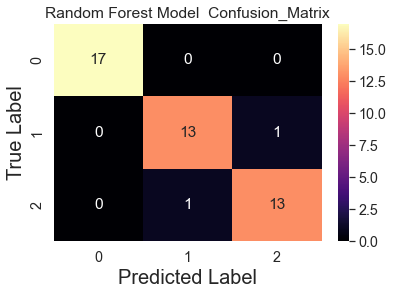

<Figure size 288x144 with 0 Axes>

In [26]:
RF_model = RandomForestClassifier(n_estimators=10)
RF_model.fit(x_train,y_train)
ypred_rf = RF_model.predict(x_test)
print("classification report\n:", classification_report(y_test, ypred_rf))
rf_confusion_matrix = confusion_matrix(y_test, ypred_rf)
rf_cm_df = pd.DataFrame(rf_confusion_matrix)


# plot the confusion_matrix
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(4,2))
sns.heatmap(rf_cm_df, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Random Forest Model  Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()
# random forest f1_score is 95.33

Support Vector Machine Model:

classification report
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



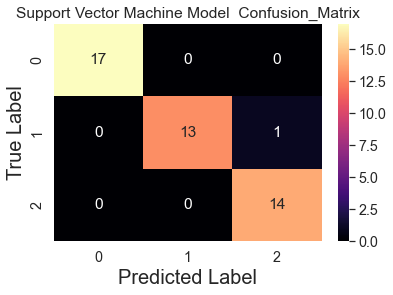

<Figure size 288x144 with 0 Axes>

In [36]:
SVM_model = SVC(C=1, kernel='rbf', tol=0.001)
SVM_model.fit(x_train,y_train)
ypred_svm = SVM_model.predict(x_test)
svm_confusion_matrix = confusion_matrix(y_test, ypred_svm)
svm_cm_df = pd.DataFrame(svm_confusion_matrix)
print("classification report\n:", classification_report(y_test, ypred_svm))
# plot the confusion_matrix
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(4,2))
sns.heatmap(svm_cm_df, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Support Vector Machine Model  Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()
# support vector machine f1_score is 97.66

KNN Model :

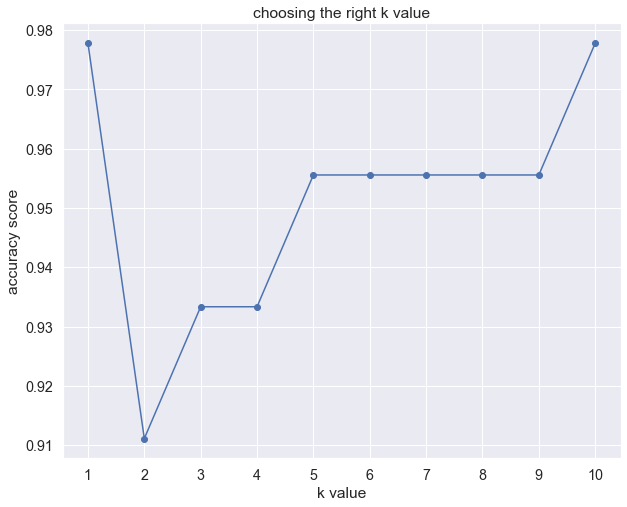

In [28]:
# select the right k value

k_values = [ ]
accuracy_scores = [ ]
cols = ['k_val', 'acc_scores'] 
for n in range(1,11):
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(x_train,y_train)
    ypred_knn = knn_model.predict(x_test)
    k_values.append(n)
    accuracy_scores.append(accuracy_score(y_test, ypred_knn))
knn_df = pd.DataFrame(list(zip(k_values,accuracy_scores)), columns = cols)


# visualise the k valus
plt.figure(figsize=(10,8))
plt.plot(range(1,11), accuracy_scores, marker = "o")
plt.xlabel("k value")
plt.ylabel("accuracy score")
plt.title("choosing the right k value")
plt.xticks(range(1,11))
plt.show()

# k value with highest accuracy score is from 1 to 10 except 7



classification report
:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



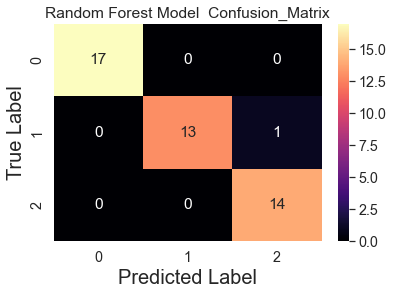

<Figure size 288x144 with 0 Axes>

In [32]:
# build k-nearest neigbor algorithm/model. 
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)
ypred_knn = knn_model.predict(x_test)
print("classification report\n:", classification_report(y_test, ypred_knn))
knn_confusion_matrix = confusion_matrix(y_test, ypred_knn)
knn_cm_df = pd.DataFrame(knn_confusion_matrix)


# plot the confusion_matrix
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(4,2))
sns.heatmap(knn_cm_df, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Random Forest Model  Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()  
# KNN f1_score is 97.66

TESTING THE MODEL:

In [37]:
# generating random values for ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
class_labels = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
sepal_length_list = np.random.uniform(4.3, 8.0, size=(1,30)).round(1)
sepal_width_list = np.random.uniform(2.0, 4.5, size=(1,30)).round(1)
petal_length_list = np.random.uniform(1.0, 7.0, size=(1,30)).round(1)
petal_width_list = np.random.uniform(0.1, 2.6, size=(1,30)).round(1)
for i,j,k,l in zip(sepal_length_list, sepal_width_list, petal_length_list, petal_width_list):
    x_new = np.array((i,j,k,l)).T 
df1 = pd.DataFrame(x_new, columns=class_labels)

In [38]:
df1.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.7,3.3,6.5,0.2
1,5.3,3.6,3.6,0.8


In [39]:
# predicting the class type for the new generated x_test called x_new using different model.
models = [knn_model, SVM_model, dt_model, RF_model]
for i in models:
    if i == knn_model:
        prediction = i.predict(x_new)
        knn_species = lb.inverse_transform(prediction)
        df1['KNN Prediction'] = knn_species
    elif i == dt_model:
        prediction = i.predict(x_new)
        dt_species = lb.inverse_transform(prediction)
        df1['DT Prediction'] = dt_species
    elif i == RF_model:
        prediction = i.predict(x_new)
        RF_species = lb.inverse_transform(prediction)
        df1['RF Prediction'] = RF_species
    else:
        prediction = i.predict(x_new)
        SVM_species = lb.inverse_transform(prediction)
        df1['SVM Prediction'] = SVM_species

In [231]:
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,KNN Prediction,SVM Prediction,DT Prediction,RF Prediction
0,6.4,4.1,4.8,0.8,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
1,7.5,2.5,3.5,0.7,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
2,6.7,4.0,4.0,0.3,Iris-virginica,Iris-virginica,Iris-versicolor,Iris-virginica
3,6.4,2.0,5.1,2.0,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
4,7.5,4.2,6.9,2.2,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
5,7.7,2.1,5.5,0.6,Iris-virginica,Iris-virginica,Iris-versicolor,Iris-virginica
6,6.3,4.1,2.2,0.3,Iris-virginica,Iris-virginica,Iris-versicolor,Iris-virginica
7,6.3,3.8,3.9,1.0,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
8,6.5,2.8,5.8,2.2,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
9,6.6,4.4,6.6,0.7,Iris-virginica,Iris-virginica,Iris-virginica,Iris-virginica
